## Assignment 4
# MNIST Classification with CNN

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## FUNCTIONS and CONSTANTS

In [169]:
IMAGE_SIZE = 28
IMAGE_CHANNELS = 1

In [170]:
def vectorize_dataframe(dataframe: pd.DataFrame, target="label"):
    X, y = None, None
    if target not in dataframe.columns:
        raise ValueError(f"{target} Variable Not In Given Dataframe")
    y = dataframe[target].to_numpy().flatten()
    X = dataframe.drop(target, axis=1).to_numpy()
    X = X.reshape(X.shape[0],IMAGE_SIZE,IMAGE_SIZE,IMAGE_CHANNELS)
    return X, y

## Step 1: Load The Data

In [171]:
# CHECK FOR DATAFILES
DATA_DIR = "./archive"
assert os.path.exists(DATA_DIR), "Data Directory Not Found,Update DIR_PATH Variable"

# DATA LOADING
test_data = pd.read_csv(os.path.join(DATA_DIR, "mnist_test.csv"))
train_data = pd.read_csv(os.path.join(DATA_DIR, "mnist_train.csv"))

print(f"TEST DATA SHAPE :{test_data.shape}")
print(f"TRAIN DATA SHAPE : {train_data.shape}")

TEST DATA SHAPE :(10000, 785)
TRAIN DATA SHAPE : (60000, 785)


In [172]:
X_train, y_train = vectorize_dataframe(train_data)
X_test, y_test = vectorize_dataframe(test_data)

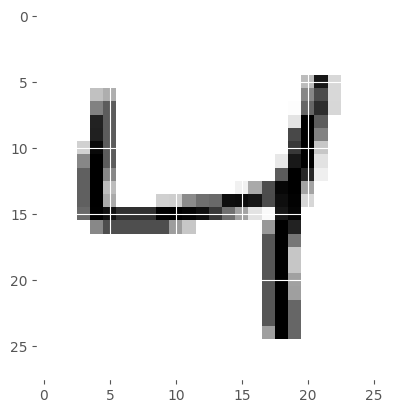

In [173]:
plt.imshow(X_train[2],cmap=plt.cm.binary)
plt.show()

In [174]:
# Nomralize Input Featues
X_train = X_train/255
X_test = X_test/255

In [175]:
# test and validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=65)

In [176]:
print(f"TEST DATA SHAPE :{X_test.shape}")
print(f"TRAIN DATA SHAPE : {X_train.shape}")
print(f"VALIDATION DATA SHAPE : {X_val.shape}")

TEST DATA SHAPE :(10000, 28, 28, 1)
TRAIN DATA SHAPE : (48000, 28, 28, 1)
VALIDATION DATA SHAPE : (12000, 28, 28, 1)


## Step 2: Create CNN

In [177]:
model = Sequential()
# Model Summary before defining Structure
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Define CNN Architecture:

In [178]:
# Input Layer: Accepts grayscale images of size 28x28 pixels
model.add(layers.InputLayer(
        shape=(IMAGE_SIZE, IMAGE_SIZE, IMAGE_CHANNELS),
        name="Input_Layer")
        )

# First Convolutional Layer: Use 8 filters with a kernel size of 3x3 and 'relu' activation.
model.add(
    layers.Conv2D(
        filters=8,
        strides=1,
        kernel_size=(3, 3),
        activation="relu",
        padding="same",
        name="Convolutional_Layer_1",
    )
)

# First Pooling Layer: Apply a 2x2 max pooling layer with a stride of 2
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name="Pooling_Layer_1"))

# Second Convolutional Layer: Use 16 filters of size 3x3 with 'relu' activation and 'same' padding
model.add(
    layers.Conv2D(
        filters=16,
        strides=1,
        kernel_size=(3, 3),
        activation="relu",
        padding="same",
        name="Convolutional_Layer_2",
    )
)


# Second Pooling Layer: Apply a 2x2 max pooling layer with a stride of 2
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name="Pooling_Layer_2"))


# Flatten Layer: The output of the last pooling layer is flattened into a 1D vector
model.add(layers.Flatten(name="Flatten_layer"))

# Dense Layer One:
model.add(layers.Dense(units=128, activation="relu", name="Dense_layer_1"))

# Dropout Layer to prevent overfitting
model.add(layers.Dropout(0.2))

# Output Layer: A final dense layer with 10 units (one for each digit) and softmax activation.
model.add(layers.Dense(units= 10, activation="softmax", name="Output_layer"))

In [179]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Convolutional_Layer_1 (Conv2D)  │ (None, 28, 28, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pooling_Layer_1 (MaxPooling2D)  │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Convolutional_Layer_2 (Conv2D)  │ (None, 14, 14, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pooling_Layer_2 (MaxPooling2D)  │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten_layer (Flatten)         │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_layer_1 (Dense)           │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,018 (402.41 KB)

 Trainable params: 103,018 (402.41 KB)

 Non-trainable params: 0 (0.00 B)

### Number of Featuers in each layer

In [200]:
print("Number of parameters in layer:")
for layer in model.layers:
    print(f"\t{layer.name}: {layer.count_params()}")

Number of parameters in layer:
	Convolutional_Layer_1: 80
	Pooling_Layer_1: 0
	Convolutional_Layer_2: 1168
	Pooling_Layer_2: 0
	Flatten_layer: 0
	Dense_layer_1: 100480
	dropout_3: 0
	Output_layer: 1290


#### Compile Model

In [180]:
optimizer = Adam(learning_rate=0.001)

model.compile(
    optimizer=optimizer, 
    loss="sparse_categorical_crossentropy", 
    metrics=["accuracy"]
)
model.build()
print("Model Compiled Successfully")

Model Compiled Successfully


### Train the model

In [181]:
training_history = model.fit(
    X_train,
    y_train, 
    batch_size=32,
    epochs=100,
    validation_data=(X_val, y_val), 
)
print("Model Trained Successfully")

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8510 - loss: 0.4842 - val_accuracy: 0.9794 - val_loss: 0.0708
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9785 - loss: 0.0680 - val_accuracy: 0.9855 - val_loss: 0.0511
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9850 - loss: 0.0504 - val_accuracy: 0.9852 - val_loss: 0.0496
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9876 - loss: 0.0390 - val_accuracy: 0.9858 - val_loss: 0.0483
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9905 - loss: 0.0286 - val_accuracy: 0.9868 - val_loss: 0.0461
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9921 - loss: 0.0245 - val_accuracy: 0.9878 - val_loss: 0.0472
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9928 - loss: 0.0214 - val_accuracy: 0.9887 - val_loss: 0.0444
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9939 - loss: 0

### Plotting training and validation accuracy

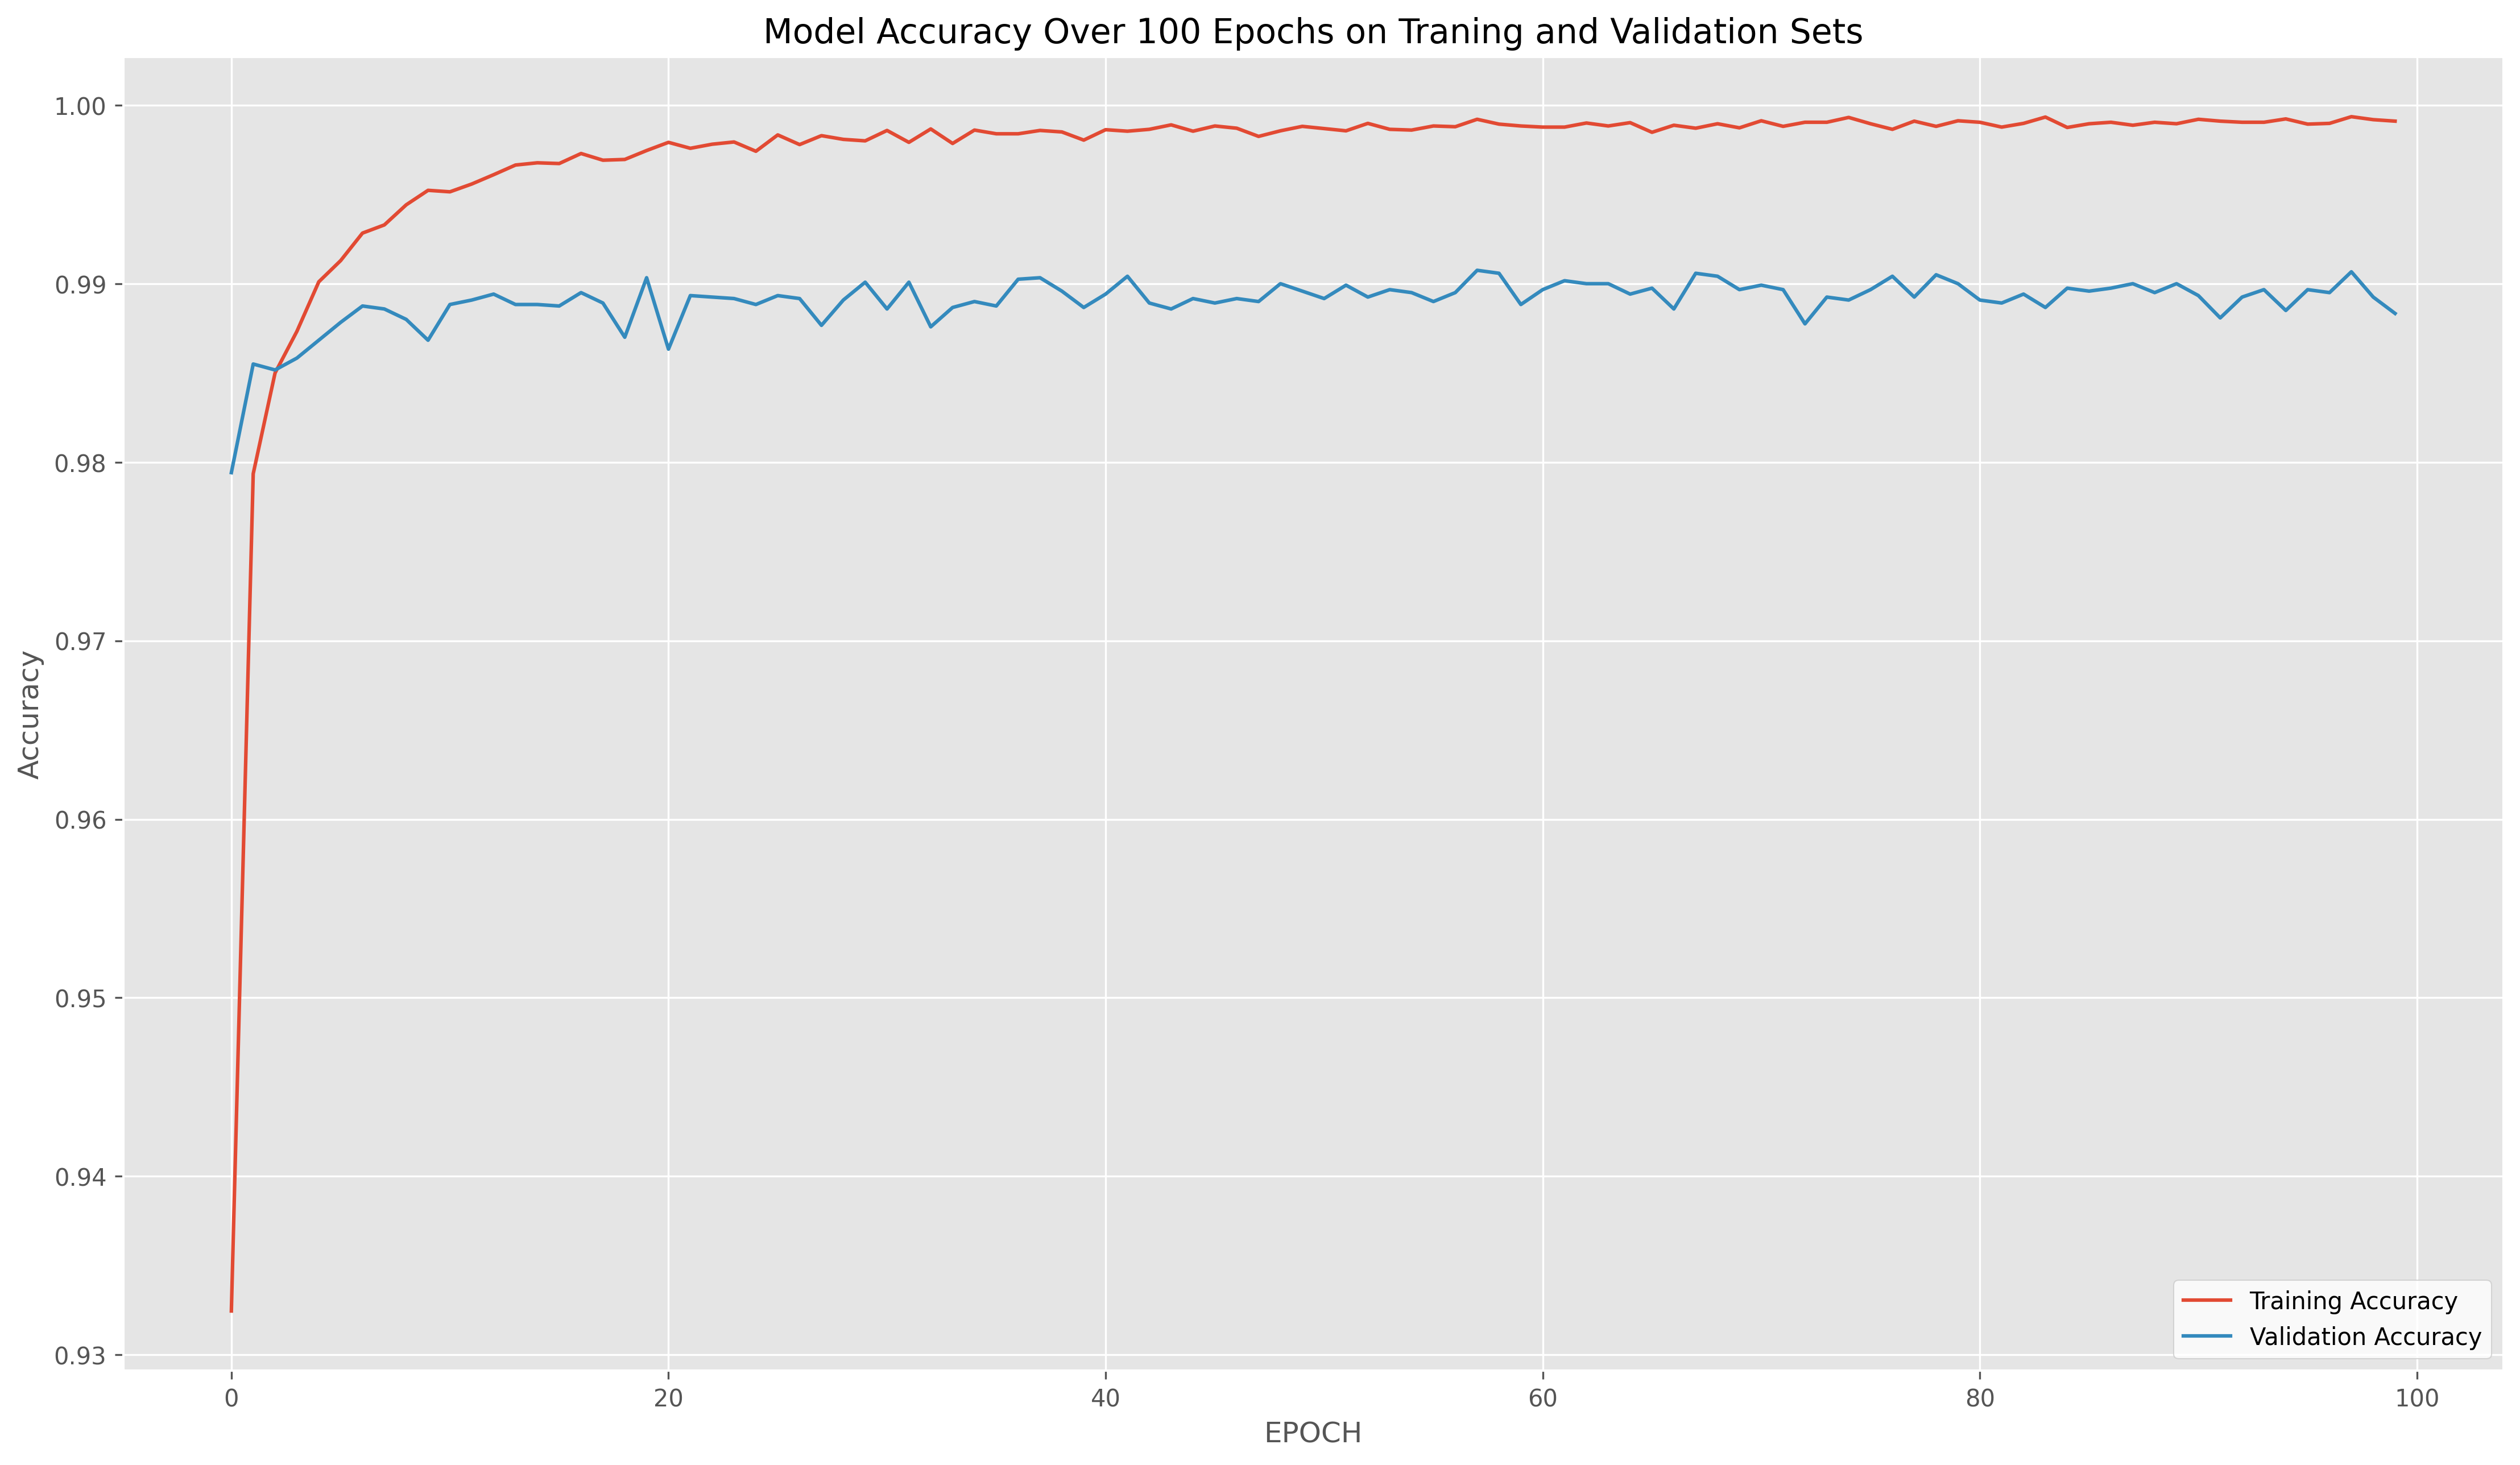

In [182]:
plt.style.use("ggplot")
plt.figure(dpi=300,figsize=(18,10))
plt.plot(training_history.history["accuracy"], label="Training Accuracy")
plt.plot(training_history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy Over 100 Epochs on Traning and Validation Sets",color="black")
plt.legend(frameon=True,facecolor="white",labelcolor="black",loc="lower right")
plt.xlabel("EPOCH")
plt.ylabel("Accuracy")
plt.savefig(
    "Model Accuracy While Training Over 100.png",
    bbox_inches="tight",
    pad_inches=0.24,
    transparent=True,
)
plt.show()

### Accuracy For Training,Validation and Test Sets

In [183]:
training_accuracy= model.evaluate(X_train,y_train)
validation_accuracy = model.evaluate(X_val,y_val)
testing_accuracy = model.evaluate(X_test,y_test)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9998 - loss: 5.5580e-04
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9882 - loss: 0.1697
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9891 - loss: 0.0904


### Confusion Matrix

In [184]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [185]:
cm = confusion_matrix(y_test,y_pred)

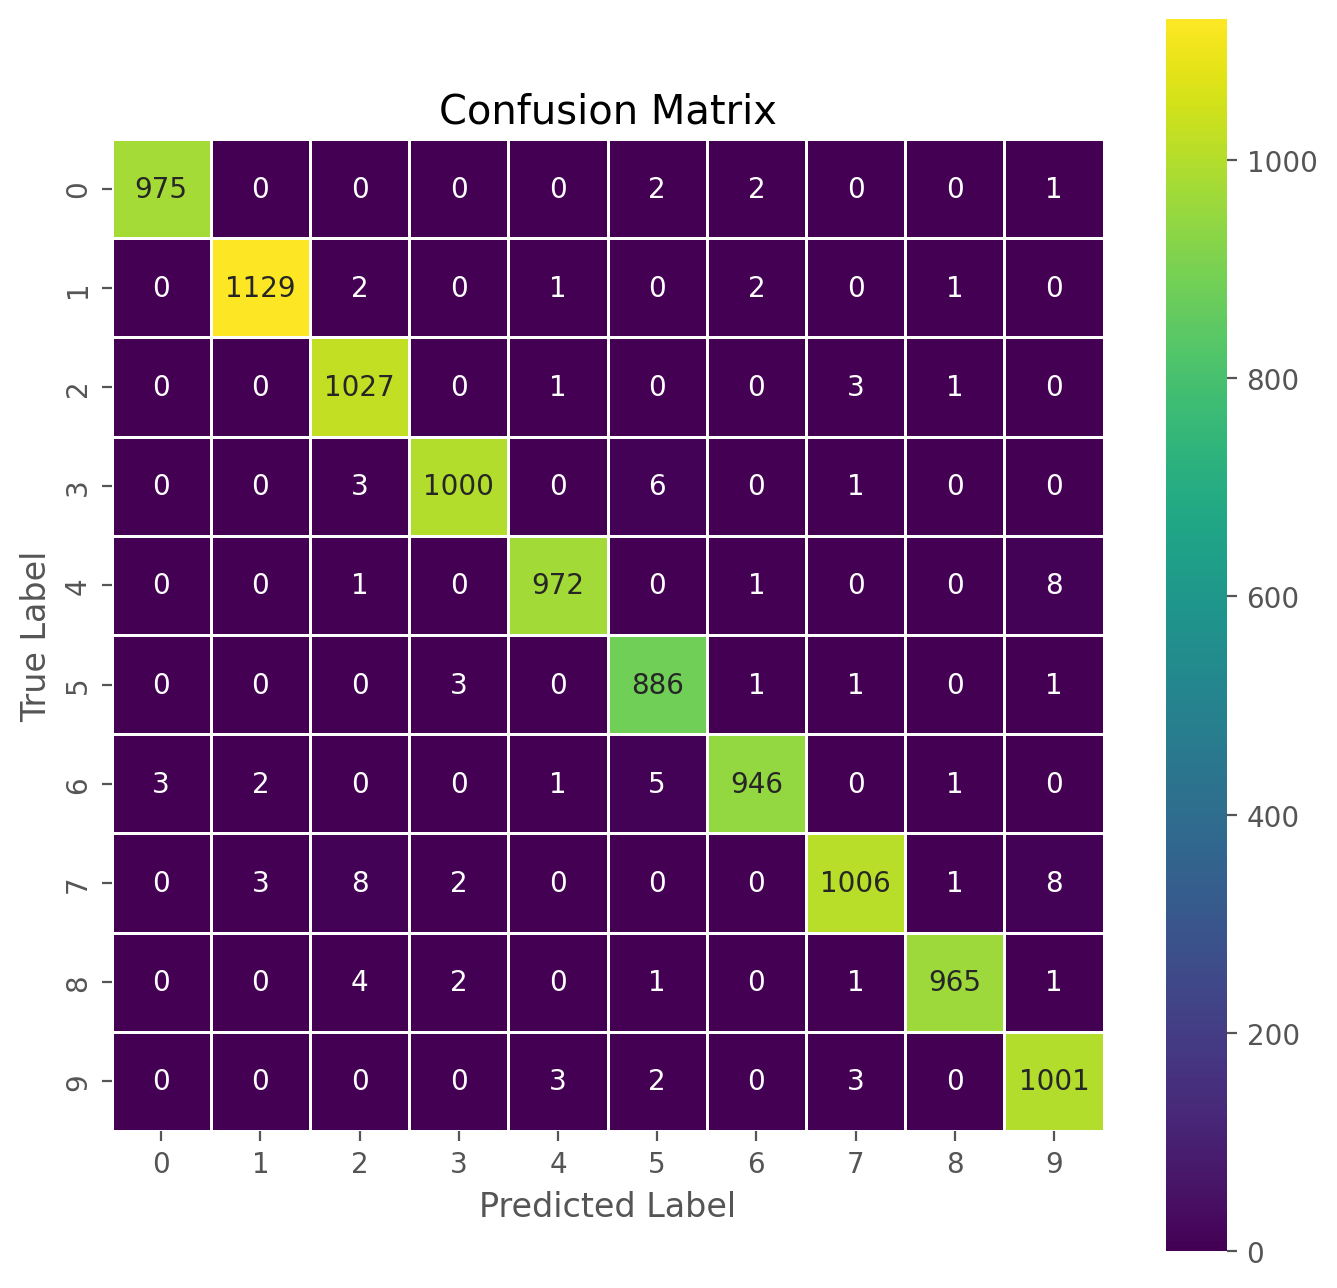

In [186]:
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(
    cm, annot=True, linewidths=0.5, fmt="d", cmap="viridis", square=True, ax=ax
)
f.dpi=200
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix",color="black")
plt.savefig(
    "Confusion Matrix.png",
    bbox_inches="tight",
    pad_inches=0.24,
    transparent=True,
)
plt.show()

### Extract Feature Vectors

In [187]:
feature_extractor = Model(
    inputs=model.get_layer(index=0).input,
    outputs=model.get_layer("Flatten_layer").output,
)

In [206]:
train_features = feature_extractor.predict(X_train)
test_features = feature_extractor.predict(X_test)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [207]:
knn = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
knn.fit(train_features, y_train)

KNeighborsClassifier(metric='euclidean')

In [208]:
y_pred = knn.predict(test_features)
accuracy = accuracy_score(y_test, y_pred)
print(f"k-NN Accuracy: {accuracy:.4f}")

k-NN Accuracy: 0.9829


### Apply PCA to the entire test feature vectors 

In [ ]:
# # Normalize Before
# scaler = StandardScaler()
# train_features = scaler.fit_transform(train_features)
# test_features = scaler.fit_transform(test_features)

In [209]:
pca = PCA(n_components=2)
test_features_2d = pca.fit_transform(test_features)

#### Plot the mapped features.

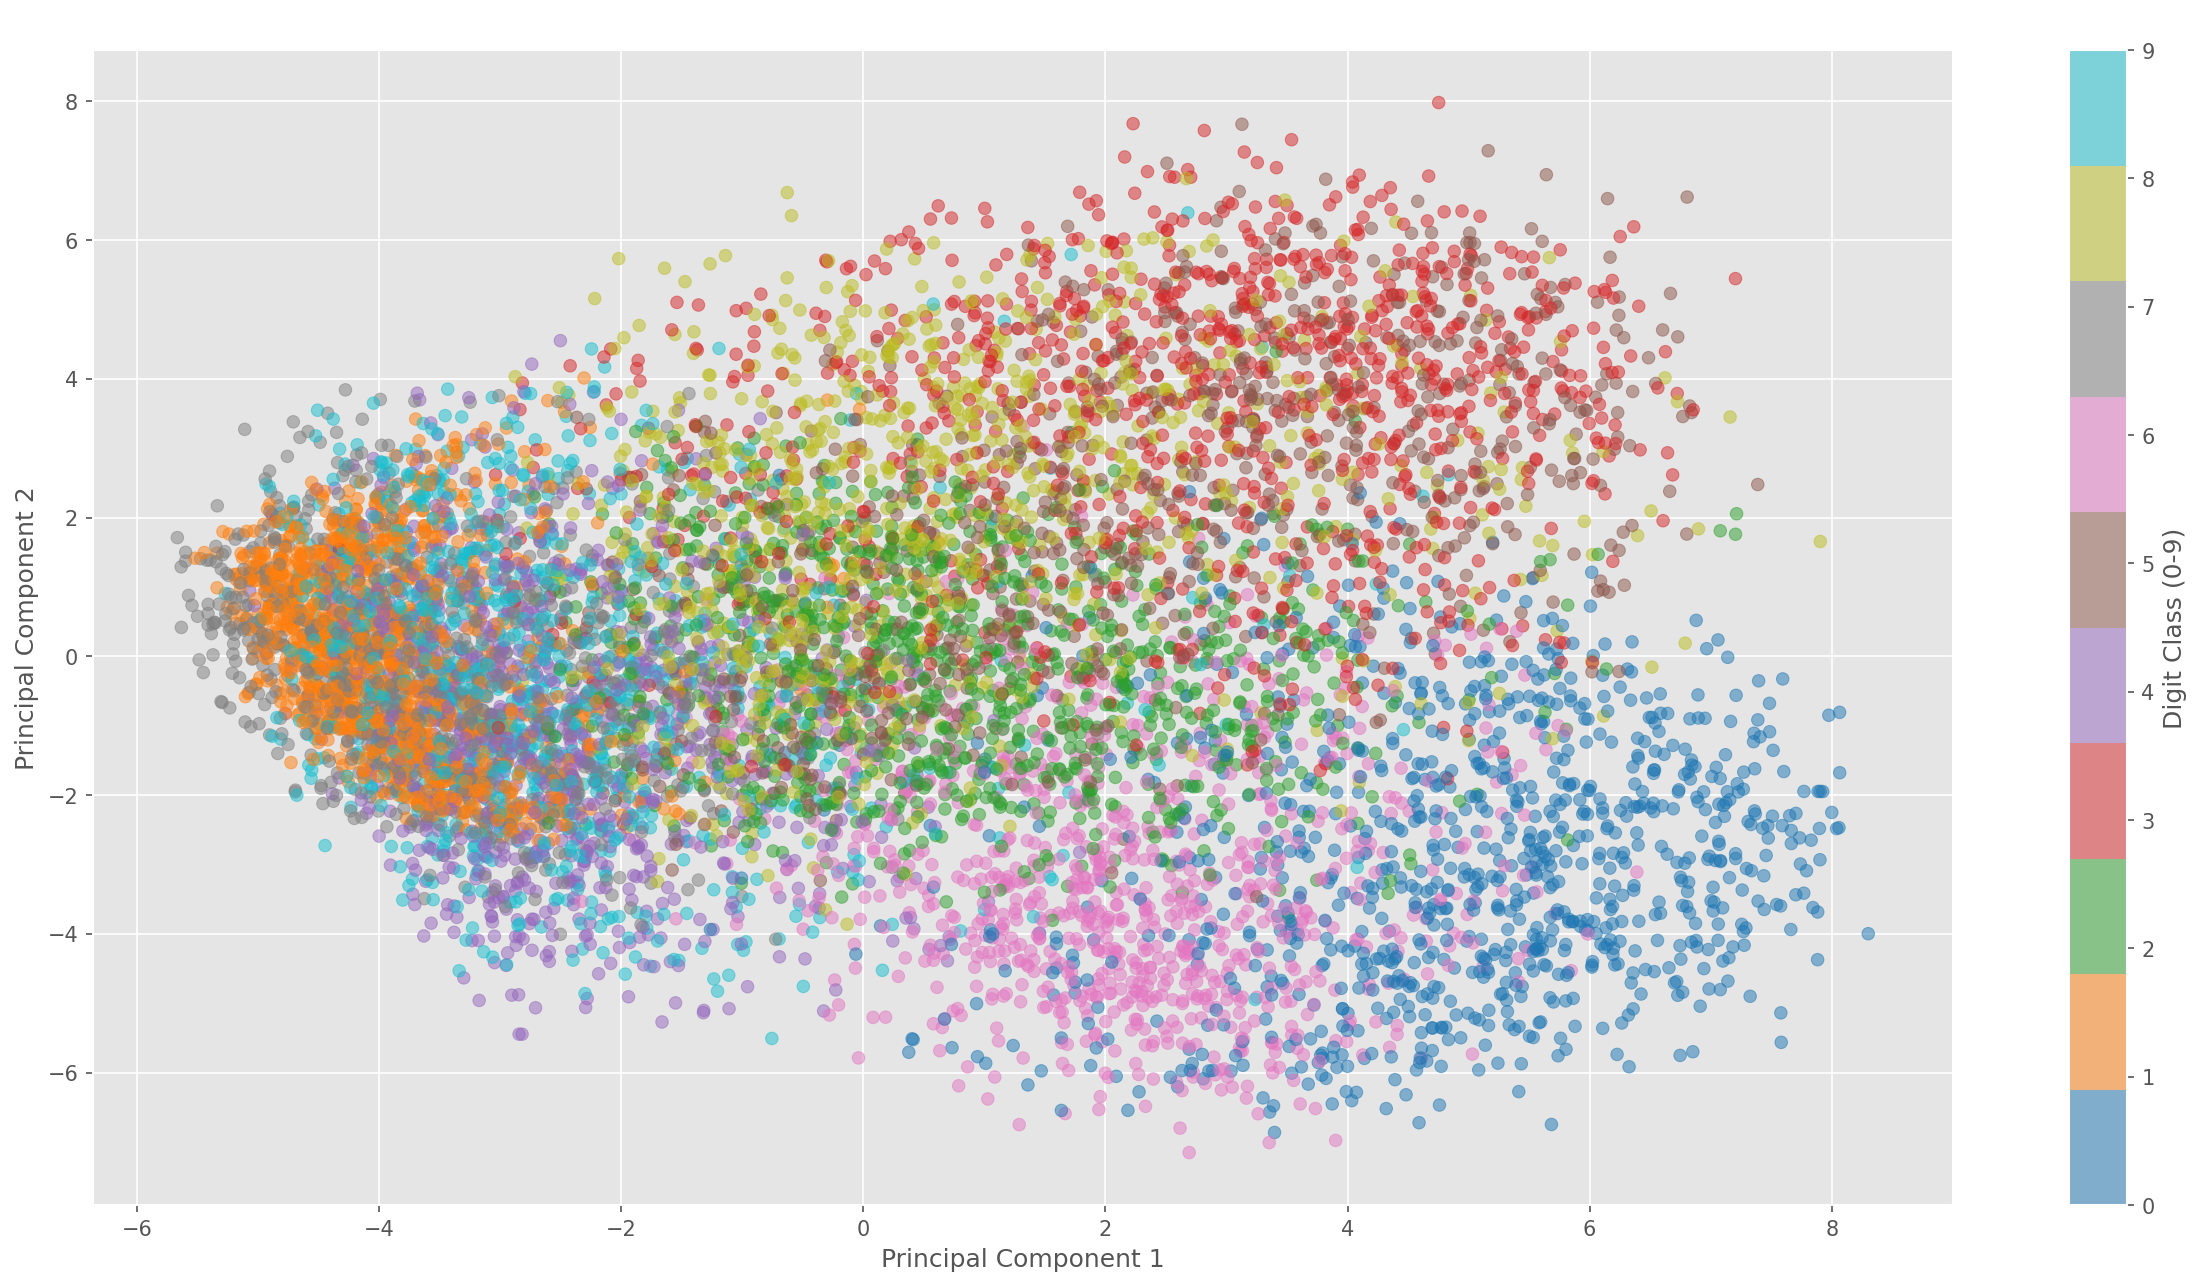

In [210]:
plt.figure(figsize=(20, 10),dpi=150)
scatter = plt.scatter(
    test_features_2d[:, 0], test_features_2d[:, 1], c=y_test, cmap="tab10", alpha=0.5
)
plt.colorbar(scatter, label="Digit Class (0-9)")
plt.title("PCA Visualization of CNN-Extracted Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.savefig(
    "PCA Visualization of CNN-Extracted Features.png",
    bbox_inches="tight",
    pad_inches=0.24,
    transparent=True,
)
plt.show()

### Repeat the previous step with 10 principal components for entire training and test sets

In [211]:
pca_10 = PCA(n_components=10)
train_features_10d = pca_10.fit_transform(train_features)
test_features_10d = pca_10.transform(test_features)

In [212]:
knn_10d = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
knn_10d.fit(train_features_10d, y_train)

KNeighborsClassifier(metric='euclidean')

In [196]:
y_pred = knn_10d.predict(test_features_10d)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with PCA with 10 Dimensions: {test_accuracy:.4f}")

Test Accuracy with PCA with 10 Dimensions: 0.9570
